# cygnus-large-l2c
Evaluate Bythio with a 2 MiB / 4 MiB L2C (4x / 8x the original size of 512 KiB).

In [1]:
from importlib import reload
from matplotlib import colormaps
from utils import plots, stats, tables, utils

In [4]:
# Knobs
base_dir = '/u/cmolder/GitHub/ChampSim/out/pythia/'
suites = [
    #('spec06', 'one_phase'),
    ('spec06', 'weighted'),
    #('gap', 'one_phase'),
    #('google', 'one_phase')
]
metrics  = [
    'ipc_improvement',
    'L2C_pf_issued',
    #'L2C_pf_useless_unused',
    #'L2C_pf_useless_hit',
]
pythia_features = [{'Delta_Path', 'PC_Delta'}, {'PC'}, {'PC_Delta'}, {'Delta_Path'}, {'Global'}]
bythio_features = [{'Delta_Path', 'PC_Delta'}, {'PC'}, {'PC_Delta'}, {'Delta_Path'}, {'Global'}]
baselines = ['bo', 'spp_dev2', 'bingo', 'next_line', 'ip_stride']
dpi = 150
cmaps = {
    'Pythia': colormaps['Blues'],
    'Pythia-Ignore': colormaps['Purples'],
    'Cygnus': colormaps['Reds'],
    'Cygnus-Ignore': colormaps['Greens'],
    'SPP': colormaps['Oranges'],
    'PPF': colormaps['Greys'],
}

# Plots (suites)

In [5]:
reload(tables)
reload(utils)
dfs = {
    # ===== Degree 1, 512 KiB =====
    'degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/pythia/nozeroaction.csv', 
        pythia_features),

    'degree1/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree1/bythio/nozeroaction_pythialike_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree1/bythio/nozeroaction_pythialike_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),
    
    'degree1/spp/l2only': tables.load_stats_csv(
        base_dir, 'degree1/spp/l2only.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    'degree1/spp/l2only_zerothreshold': tables.load_stats_csv(
        base_dir, 'degree1/spp/l2only_zerothreshold.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    # ===== Degree 2, 512 KiB =====
    'degree2/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree2/pythia/nozeroaction.csv', 
        pythia_features),

    'degree2/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree2/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree2/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree2/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree2/spp/l2only': tables.load_stats_csv(
        base_dir, 'degree2/spp/l2only.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    'degree2/spp/l2only_zerothreshold': tables.load_stats_csv(
        base_dir, 'degree2/spp/l2only_zerothreshold.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    # ===== Degree 4, 512 KiB =====
    'degree4/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree4/pythia/nozeroaction.csv', 
        pythia_features),

    'degree4/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degree4/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree4/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degree4/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    'degree4/spp/l2only': tables.load_stats_csv(
        base_dir, 'degree4/spp/l2only.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    'degree4/spp/l2only_zerothreshold': tables.load_stats_csv(
        base_dir, 'degree4/spp/l2only_zerothreshold.csv',
        ['spp_dev2', 'spp_ppf_dev']),

   
    # ===== Degree Dynamic, 512 KiB =====
    'degreedyn/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/pythia/nozeroaction.csv', 
        pythia_features),

    'degreedyn/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    'degreedyn/bythio/nozeroaction_pythialike_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'degreedyn/bythio/nozeroaction_pythialike_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    'degreedyn/spp/l2only': tables.load_stats_csv(
        base_dir, 'degreedyn/spp/l2only.csv',
        ['spp_dev2', 'spp_ppf_dev']),

    # ===== Degree 1, 2 MiB =====
    'l2c_2mib_degree1/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree1/bythio/nozeroaction.csv', 
        pythia_features, feature_key='bythio_features'),

    'l2c_2mib_degree1/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree1/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'l2c_2mib_degree1/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree1/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    # ===== Degree 2, 2 MiB =====
    'l2c_2mib_degree2/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree2/bythio/nozeroaction.csv',
        pythia_features, feature_key='bythio_features'),

    'l2c_2mib_degree2/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree2/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'l2c_2mib_degree2/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree2/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    # ===== Degree 4, 2 MiB =====
    'l2c_2mib_degree4/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree4/bythio/nozeroaction.csv',
        pythia_features, feature_key='bythio_features'),

    'l2c_2mib_degree4/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree4/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'l2c_2mib_degree4/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degree4/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),

    # ===== Degree Dynamic, 2 MiB =====
    'l2c_2mib_degreedyn/pythia/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degreedyn/bythio/nozeroaction.csv', 
        pythia_features, feature_key='bythio_features'),

    'l2c_2mib_degreedyn/bythio/nozeroaction': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degreedyn/bythio/nozeroaction.csv', 
        bythio_features, feature_key='bythio_features'),

    'l2c_2mib_degreedyn/bythio/nozeroaction_ignorequeued': tables.load_stats_csv_pythia(
        base_dir, 'l2c_2mib_degreedyn/bythio/nozeroaction_ignorequeued.csv', 
        bythio_features, feature_key='bythio_features'),
}

In [7]:
baseline_colors = {
    'Pythia (PC_Delta, Delta_Path)': cmaps['Pythia'](0.4),
    'Pythia (Delta_Path)': cmaps['Pythia'](0.5),
    'Pythia (PC)': cmaps['Pythia'](0.6),
    'Pythia (Stateless)': cmaps['Pythia'](0.7),

    'Pythia-Ignore (PC_Delta, Delta_Path)':  cmaps['Pythia-Ignore'](0.4),
    'Pythia-Ignore (Delta_Path)': cmaps['Pythia-Ignore'](0.5),
    'Pythia-Ignore (PC)':  cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore (Stateless)':  cmaps['Pythia-Ignore'](0.7),

    'Cygnus-Ignore (PC_Delta, Delta_Path)': cmaps['Cygnus-Ignore'](0.4),
    'Cygnus-Ignore (Delta_Path)': cmaps['Cygnus-Ignore'](0.5),
    'Cygnus-Ignore (PC)': cmaps['Cygnus-Ignore'](0.6),
    'Cygnus-Ignore (Stateless)': cmaps['Cygnus-Ignore'](0.7),

    'Cygnus (PC_Delta, Delta_Path)': cmaps['Cygnus'](0.4),
    'Cygnus (Delta_Path)': cmaps['Cygnus'](0.5),
    'Cygnus (PC)': cmaps['Cygnus'](0.6),
    'Cygnus (Stateless)': cmaps['Cygnus'](0.7),

    'BO-Adjusted': 'darkgoldenrod',
    'BO': 'goldenrod',
}

## 512 KiB cache

### Degree 1

In [ ]:
degree1_512kib_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    #'Pythia (PC)': dfs['degree1/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['degree1/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Bythio-Ignore (PC)': dfs['degree1/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['degree1/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)' : dfs['degree1/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC)': dfs['degree1/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['degree1/bythio/nozeroaction']['Global'],
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

In [ ]:
plots.plot_everything(degree1_512kib_df, suites=suites, metrics=metrics, colors=baseline_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle="512 KiB L2C, 1")

### Degree 2

In [12]:
degree2_512kib_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degree2/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],

    #'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['degree4/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Cygnus-Ignore (PC)': dfs['degree2/bythio/nozeroaction_ignorequeued']['PC'],
    #'Bythio-Ignore (Stateless)': dfs['degree4/bythio/nozeroaction_ignorequeued']['Global'],

    #'Bythio (PC_Delta, Delta_Path)' : dfs['degree4/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    #'Bythio (PC)': dfs['degree4/bythio/nozeroaction']['PC'],
    #'Bythio (Stateless)': dfs['degree4/bythio/nozeroaction']['Global']
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

### Degree 4

In [13]:
degree4_512kib_df = {
    #'Pythia (PC_Delta, Delta_Path)': dfs['degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degree4/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['degree1/pythia/nozeroaction']['Global'],

    #'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['degree4/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Cygnus-Ignore (PC)': dfs['degree4/bythio/nozeroaction_ignorequeued']['PC'],
    #'Bythio-Ignore (Stateless)': dfs['degree4/bythio/nozeroaction_ignorequeued']['Global'],

    #'Bythio (PC_Delta, Delta_Path)' : dfs['degree4/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    #'Bythio (PC)': dfs['degree4/bythio/nozeroaction']['PC'],
    #'Bythio (Stateless)': dfs['degree4/bythio/nozeroaction']['Global'],
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

### Dynamic degree

In [ ]:
degreedyn_512kib_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['degreedyn/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['degreedyn/pythia/nozeroaction']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Bythio-Ignore (PC)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['degreedyn/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)' : dfs['degreedyn/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC)': dfs['degreedyn/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['degreedyn/bythio/nozeroaction']['Global'],
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

In [ ]:
plots.plot_everything(degreedyn_512kib_df, suites=suites, metrics=metrics, colors=baseline_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle="512 KiB L2C, dyn")

## 2 MiB cache

### Degree 1

In [ ]:
reload(stats)
degree1_2mib_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['l2c_2mib_degree1/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['l2c_2mib_degree1/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['l2c_2mib_degree1/pythia/nozeroaction']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)' : dfs['l2c_2mib_degree1/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Bythio-Ignore (PC)': dfs['l2c_2mib_degree1/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['l2c_2mib_degree1/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)' : dfs['l2c_2mib_degree1/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC)': dfs['l2c_2mib_degree1/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['l2c_2mib_degree1/bythio/nozeroaction']['Global'],
}

legend_kwargs = {
    'fontsize': 7,
    'ncol': 3,
}

In [ ]:
plots.plot_everything(degree1_2mib_df, suites=suites, metrics=metrics, colors=baseline_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle="2 MiB L2C, degree-1")

### Degree 2

### Degree 4

### Dynamic degree

In [ ]:
reload(plots)
from utils import stats
reload(stats)
degreedyn_2mib_df = {
    'Pythia (PC_Delta, Delta_Path)': dfs['l2c_2mib_degreedyn/pythia/nozeroaction']['Delta_Path, PC_Delta'],
    'Pythia (PC)': dfs['l2c_2mib_degreedyn/pythia/nozeroaction']['PC'],
    #'Pythia (Stateless)': dfs['l2c_2mib_degreedyn/pythia/nozeroaction']['Global'],

    'Bythio-Ignore (PC_Delta, Delta_Path)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction_ignorequeued']['Delta_Path, PC_Delta'],
    'Bythio-Ignore (PC)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction_ignorequeued']['PC'],
    'Bythio-Ignore (Stateless)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction_ignorequeued']['Global'],

    'Bythio (PC_Delta, Delta_Path)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction']['Delta_Path, PC_Delta'],
    'Bythio (PC)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction']['PC'],
    'Bythio (Stateless)': dfs['l2c_2mib_degreedyn/bythio/nozeroaction']['Global'],
}

legend_kwargs = {
    'ncol': 3,
    'fontsize': 7,
}

In [ ]:
plots.plot_everything(degreedyn_2mib_df, suites=suites, metrics=metrics, colors=baseline_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle="2 MiB L2C, degree-dyn")

## 4 MiB cache

### Degree 1

### Degree 2

### Degree 4

### Dynamic degree

## Degree comparison

In [16]:
feature = 'Delta_Path, PC_Delta'
cache_size = 512

cache_size_str = '' if cache_size == 512 else f'l2c_{cache_size//1024}mib_'
title = (f'{cache_size} KB, ' if cache_size < 1024 else f'{cache_size//1024} MB, ') + feature

degree_df = {
    'Pythia 1': dfs[f'{cache_size_str}degree1/pythia/nozeroaction'][feature],
    'Pythia 2': dfs[f'{cache_size_str}degree2/pythia/nozeroaction'][feature],
    'Pythia 4': dfs[f'{cache_size_str}degree4/pythia/nozeroaction'][feature],
    'Pythia dyn': dfs[f'{cache_size_str}degreedyn/pythia/nozeroaction'][feature],

    'Pythia-Ignore 1': dfs[f'{cache_size_str}degree1/bythio/nozeroaction_pythialike_ignorequeued'][feature],
    'Pythia-Ignore dyn': dfs[f'{cache_size_str}degreedyn/bythio/nozeroaction_pythialike_ignorequeued'][feature],

    'Bythio-Ignore 1': dfs[f'{cache_size_str}degree1/bythio/nozeroaction_ignorequeued'][feature],
    'Bythio-Ignore 2': dfs[f'{cache_size_str}degree2/bythio/nozeroaction_ignorequeued'][feature],
    'Bythio-Ignore 4': dfs[f'{cache_size_str}degree4/bythio/nozeroaction_ignorequeued'][feature],
    'Bythio-Ignore dyn': dfs[f'{cache_size_str}degreedyn/bythio/nozeroaction_ignorequeued'][feature],

    'Bythio 1': dfs[f'{cache_size_str}degree1/bythio/nozeroaction'][feature],
    'Bythio 2': dfs[f'{cache_size_str}degree2/bythio/nozeroaction'][feature],
    'Bythio 4': dfs[f'{cache_size_str}degree4/bythio/nozeroaction'][feature],
    'Bythio dyn': dfs[f'{cache_size_str}degreedyn/bythio/nozeroaction'][feature],

    #'SPP L2 only 1': dfs[f'{cache_size_str}degree1/spp/l2only']['spp_dev2'],
    #'SPP L2 only 2': dfs[f'{cache_size_str}degree2/spp/l2only']['spp_dev2'],
    #'SPP L2 only 4': dfs[f'{cache_size_str}degree4/spp/l2only']['spp_dev2'],
    #'SPP L2 only dyn': dfs[f'{cache_size_str}degreedyn/spp/l2only']['spp_dev2'],

    #'PPF L2 only 1': dfs[f'{cache_size_str}degree1/spp/l2only']['spp_ppf_dev'],
    #'PPF L2 only 2': dfs[f'{cache_size_str}degree2/spp/l2only']['spp_ppf_dev'],
    #'PPF L2 only 4': dfs[f'{cache_size_str}degree4/spp/l2only']['spp_ppf_dev'],
    #'PPF L2 only dyn': dfs[f'{cache_size_str}degreedyn/spp/l2only']['spp_ppf_dev'],

    # 'SPP L2 only ZT 1': dfs[f'{cache_size_str}degree1/spp/l2only_zerothreshold']['spp_dev2'],
    #'SPP L2 only ZT 2': dfs[f'{cache_size_str}degree2/spp/l2only_zerothreshold']['spp_dev2'],
    # 'SPP L2 only ZT 4': dfs[f'{cache_size_str}degree4/spp/l2only_zerothreshold']['spp_dev2'],

    # 'PPF L2 only ZT 1': dfs[f'{cache_size_str}degree1/spp/l2only_zerothreshold']['spp_ppf_dev'],
    #'PPF L2 only ZT 2': dfs[f'{cache_size_str}degree2/spp/l2only_zerothreshold']['spp_ppf_dev'],
    # 'PPF L2 only ZT 4': dfs[f'{cache_size_str}degree4/spp/l2only_zerothreshold']['spp_ppf_dev'],
}

degree_colors = {
    'Pythia 1': cmaps['Pythia'](0.4),
    'Pythia 2': cmaps['Pythia'](0.5),
    'Pythia 4': cmaps['Pythia'](0.6),
    'Pythia dyn': cmaps['Pythia'](0.7),

    'Pythia-Ignore 1': cmaps['Pythia-Ignore'](0.6),
    'Pythia-Ignore dyn': cmaps['Pythia-Ignore'](0.7),

    'Bythio-Ignore 1': cmaps['Bythio-Ignore'](0.4),
    'Bythio-Ignore 2': cmaps['Bythio-Ignore'](0.5),
    'Bythio-Ignore 4': cmaps['Bythio-Ignore'](0.6),
    'Bythio-Ignore dyn': cmaps['Bythio-Ignore'](0.7),

    'Bythio 1': cmaps['Bythio'](0.4),
    'Bythio 2': cmaps['Bythio'](0.5),
    'Bythio 4': cmaps['Bythio'](0.6),
    'Bythio dyn': cmaps['Bythio'](0.7),

    'SPP L2 only 1': cmaps['SPP'](0.4),
    'SPP L2 only 2': cmaps['SPP'](0.5),
    'SPP L2 only 4': cmaps['SPP'](0.6),
    'SPP L2 only dyn': cmaps['SPP'](0.7),

    'SPP L2 only ZT 1': cmaps['SPP'](0.4),
    'SPP L2 only ZT 2': cmaps['SPP'](0.5),
    'SPP L2 only ZT 4': cmaps['SPP'](0.6),

    'PPF L2 only 1': cmaps['PPF'](0.4),
    'PPF L2 only 2': cmaps['PPF'](0.5),
    'PPF L2 only 4': cmaps['PPF'](0.6),
    'PPF L2 only dyn': cmaps['PPF'](0.7),

    'PPF L2 only ZT 1': cmaps['PPF'](0.4),
    'PPF L2 only ZT 2': cmaps['PPF'](0.5),
    'PPF L2 only ZT 4': cmaps['PPF'](0.6),
}

legend_kwargs = {
    'ncol': 3,
    'fontsize': 7,
}

=== spec06 weighted ===


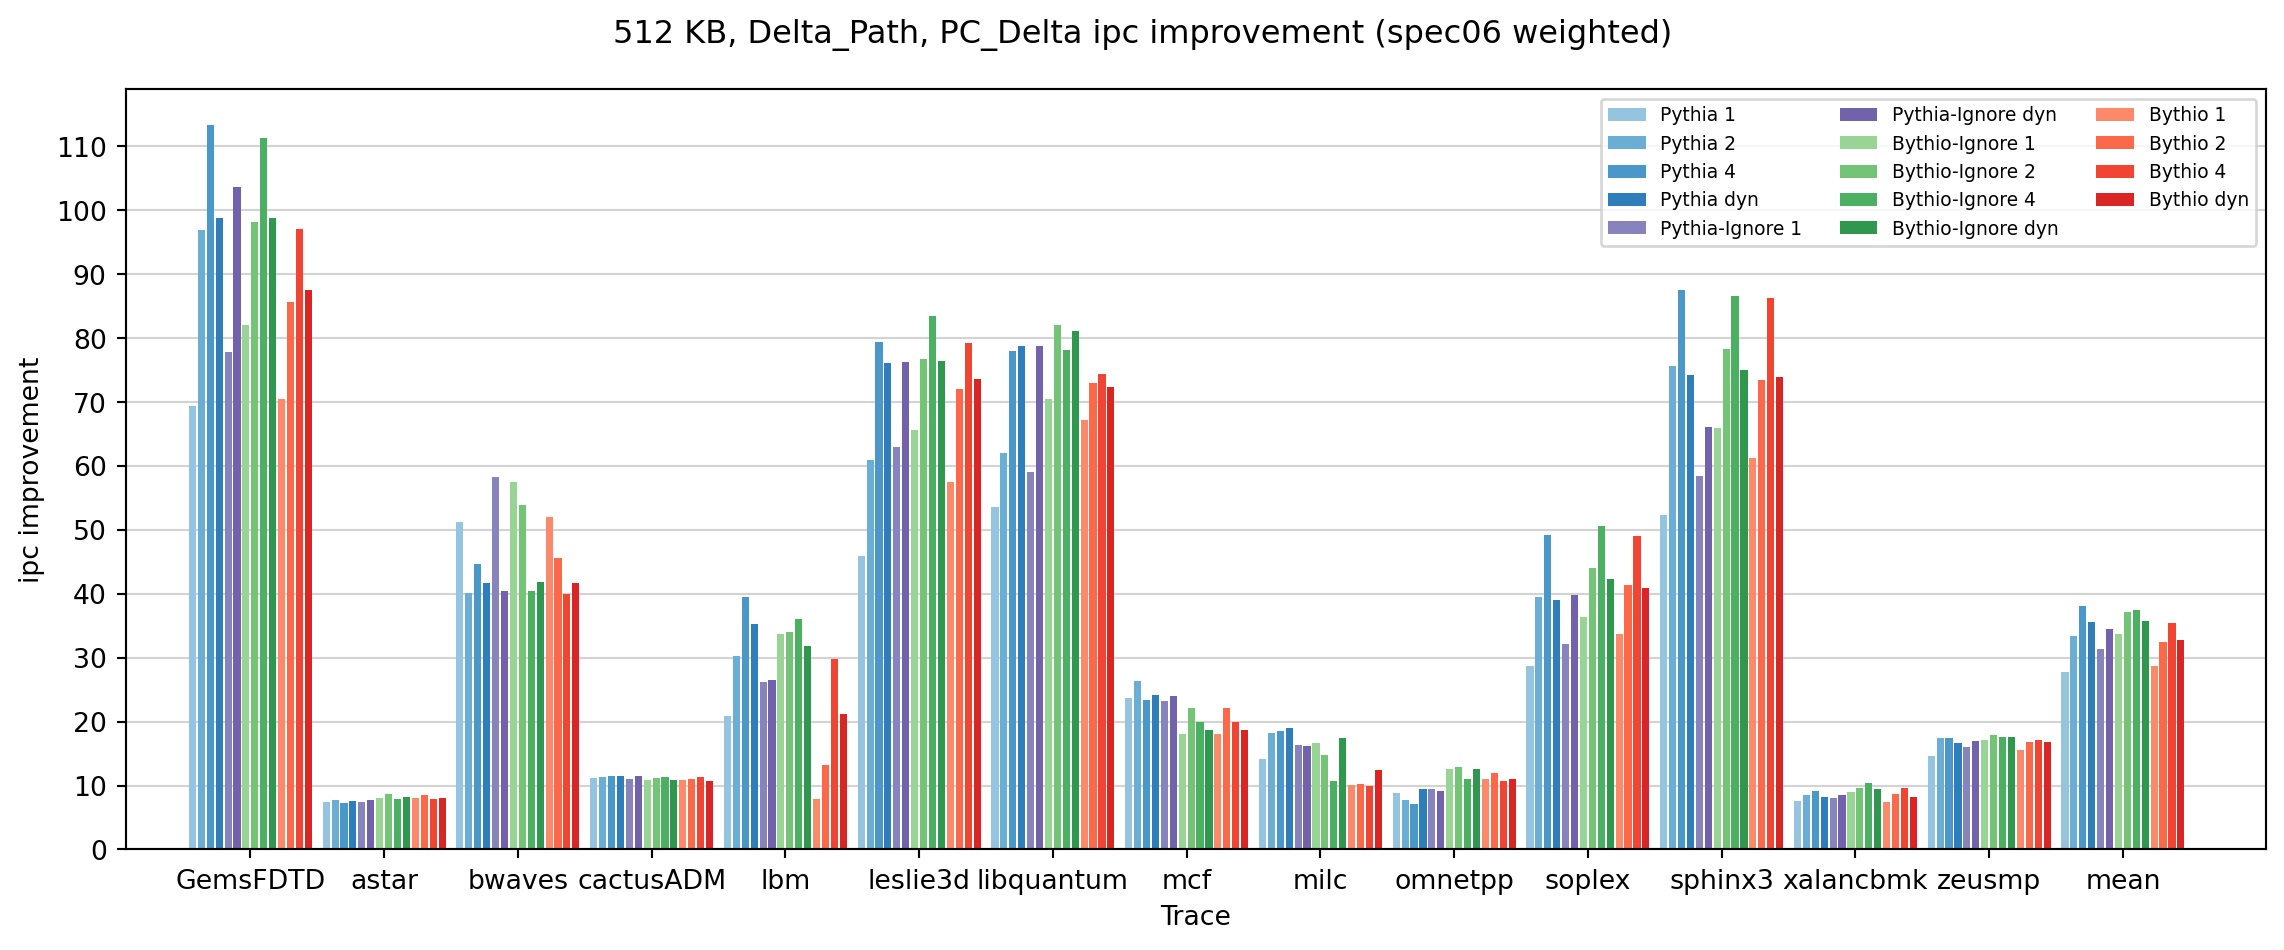

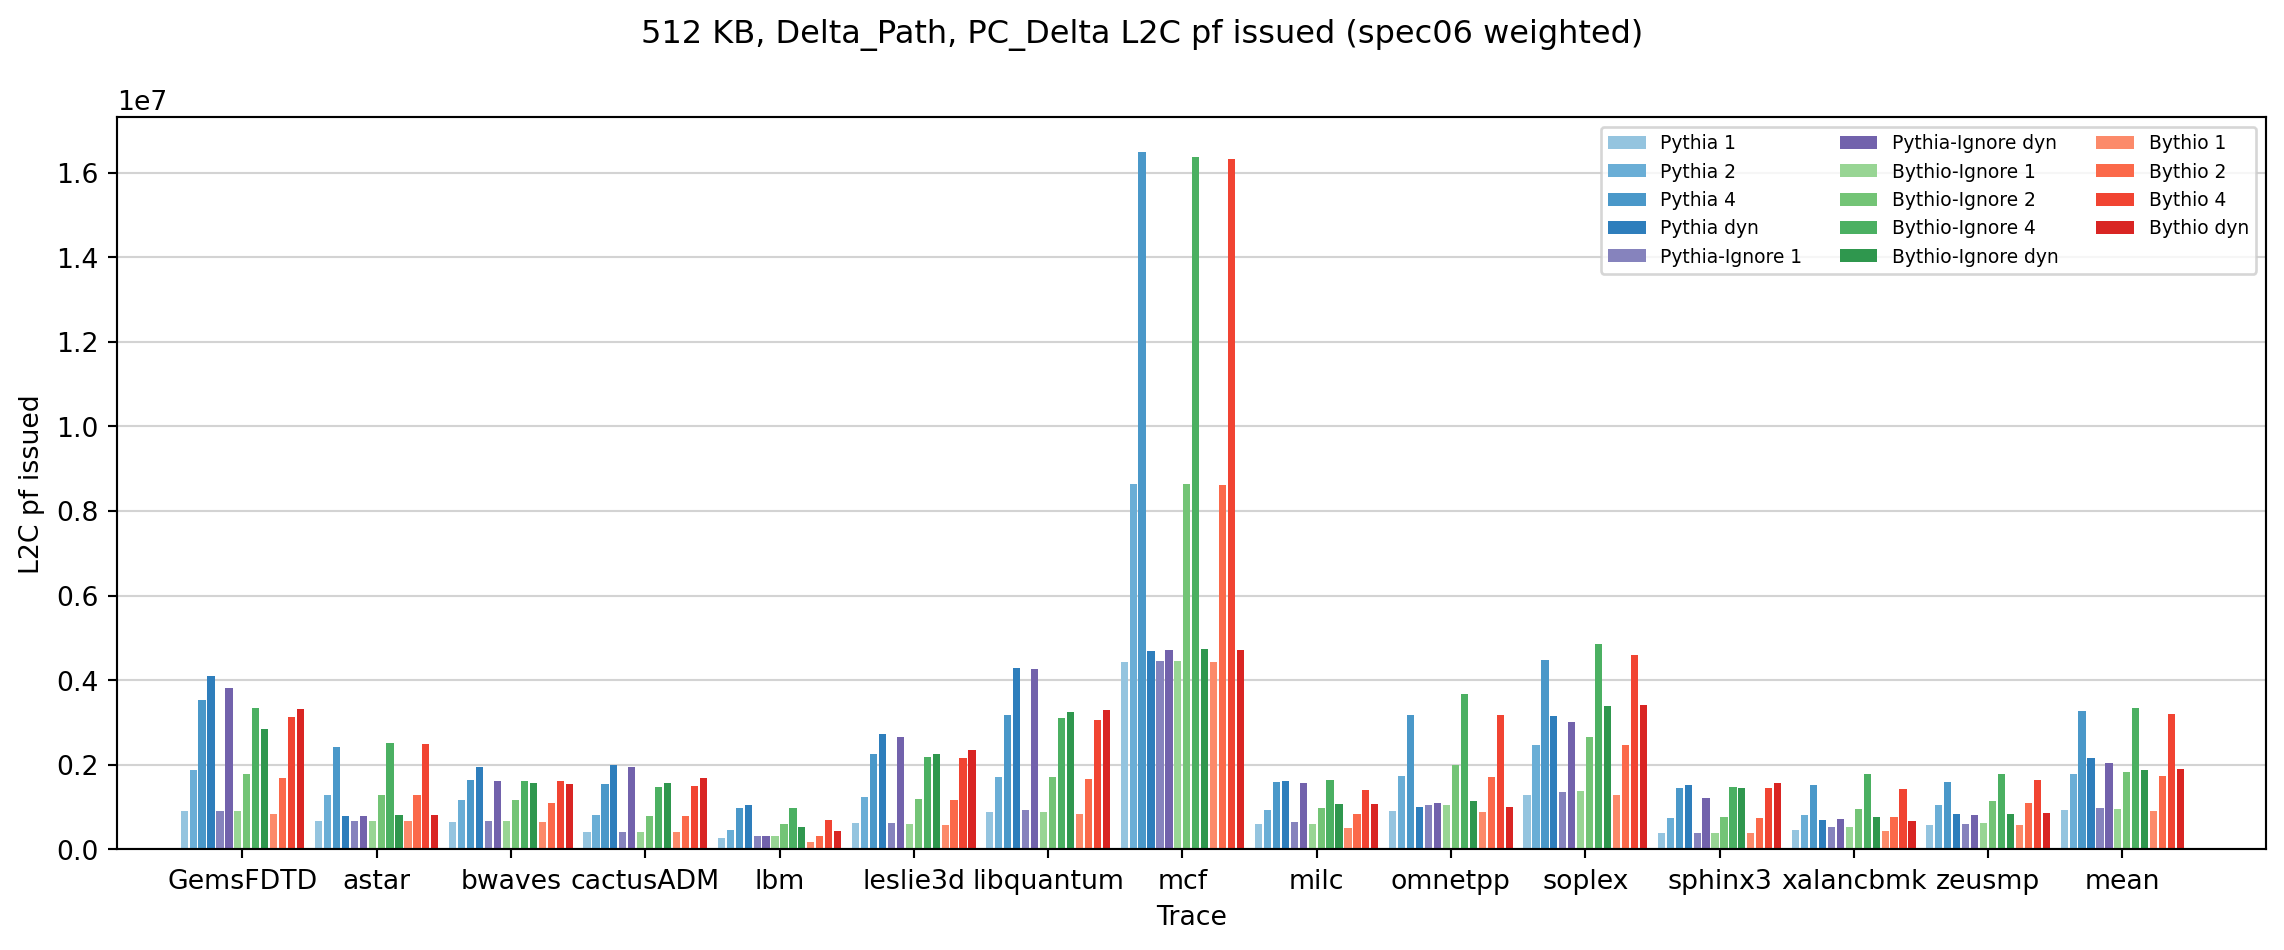

In [17]:
reload(stats)
plots.plot_everything(degree_df, suites=suites, metrics=metrics, colors=degree_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle=title)

=== spec06 weighted ===


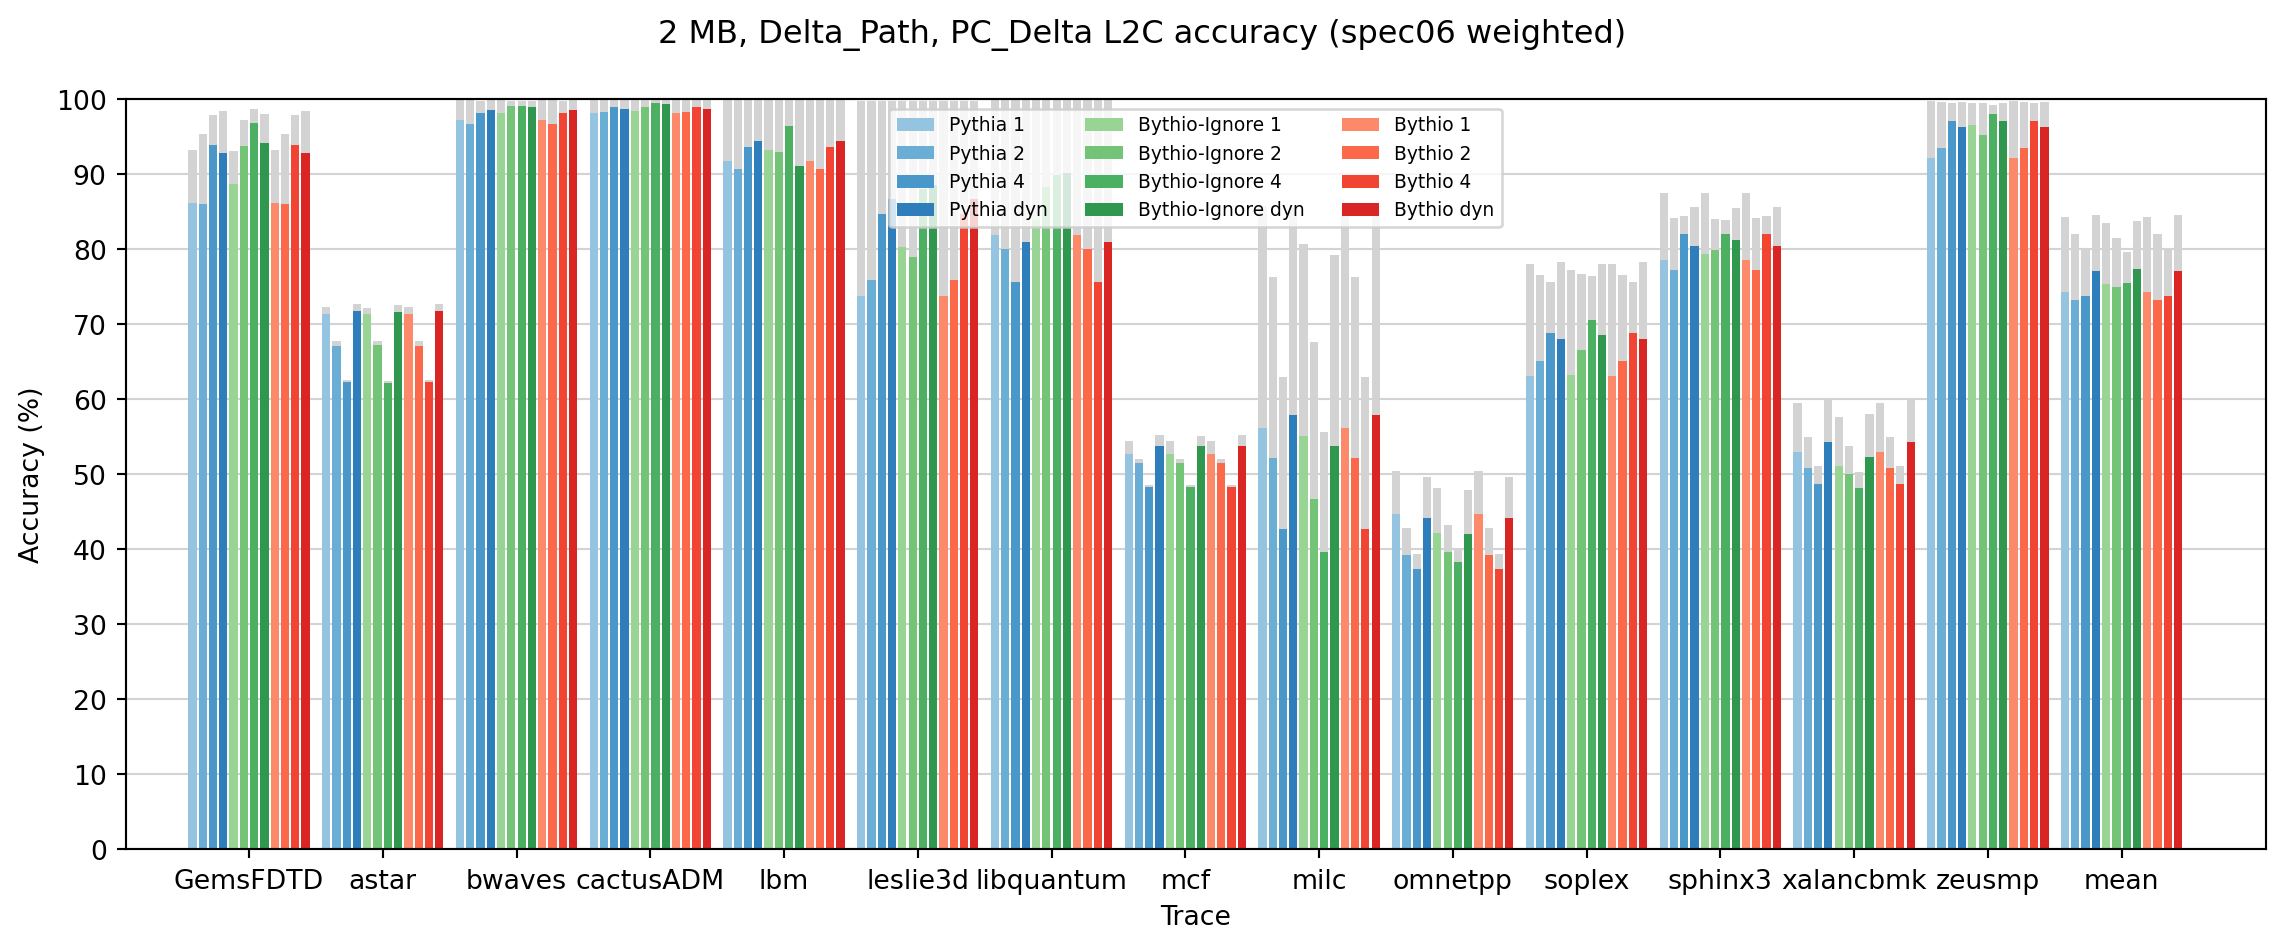

In [125]:
plots.plot_everything_accuracy(degree_df, level='L2C', suites=suites, colors=degree_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                               suptitle=title)

=== spec06 weighted ===


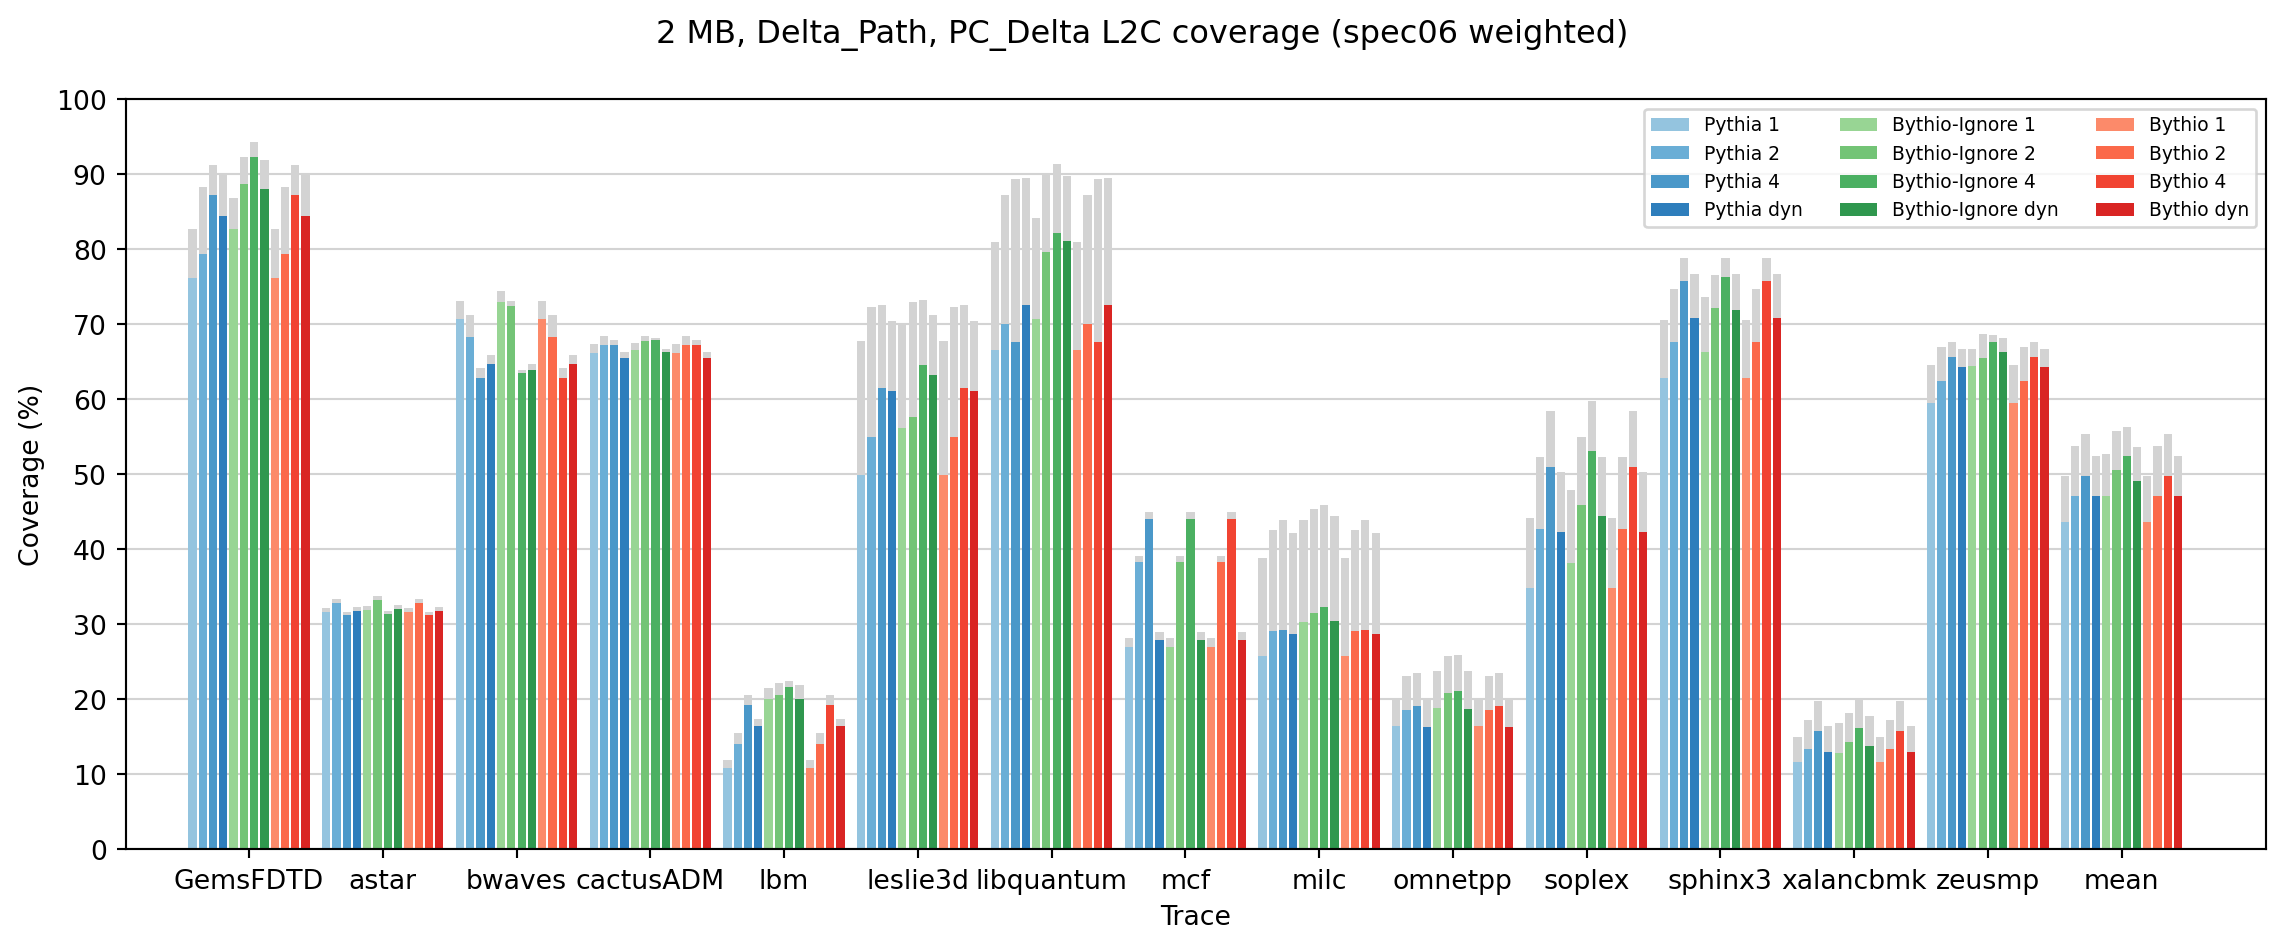

In [124]:
plots.plot_everything_coverage(degree_df, level='L2C', suites=suites, colors=degree_colors,
                               legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                               suptitle=title)

## Cache size comparison

In [ ]:
feature = 'Delta_Path, PC_Delta'
degree = 1

cache_size_df = {
    #f'(512 KiB) Pythia ({feature})': dfs[f'degree{degree}/pythia/nozeroaction'][feature],
    f'(2 MiB) Pythia ({feature})': dfs[f'l2c_2mib_degree{degree}/pythia/nozeroaction'][feature],

    f'(512 KiB) Bythio-Ignore ({feature})': dfs[f'degree{degree}/bythio/nozeroaction_ignorequeued'][feature],
    f'(2 MiB) Bythio-Ignore ({feature})' : dfs[f'l2c_2mib_degree{degree}/bythio/nozeroaction_ignorequeued'][feature],

    f'(512 KiB) Bythio ({feature})': dfs[f'degree{degree}/bythio/nozeroaction'][feature],
    f'(2 MiB) Bythio ({feature})' : dfs[f'l2c_2mib_degree{degree}/bythio/nozeroaction'][feature],
}

cache_size_colors = {
    f'(512 KiB) Pythia ({feature})':  cmaps['Pythia'](0.4),
    f'(2 MiB) Pythia ({feature})':  cmaps['Pythia'](0.6),
    f'(4 MiB) Pythia ({feature})':  cmaps['Pythia'](0.7),

    f'(512 KiB) Pythia-Ignore ({feature})': cmaps['Pythia-Ignore'](0.4),
    f'(2 MiB) Pythia-Ignore ({feature})': cmaps['Pythia-Ignore'](0.6),
    f'(4 MiB) Pythia-Ignore ({feature})':cmaps['Pythia-Ignore'](0.7),

    f'(512 KiB) Bythio-Ignore ({feature})' : cmaps['Bythio-Ignore'](0.4),
    f'(2 MiB) Bythio-Ignore ({feature})': cmaps['Bythio-Ignore'](0.6),
    f'(4 MiB) Bythio-Ignore ({feature})': cmaps['Bythio-Ignore'](0.7),

    f'(512 KiB) Bythio ({feature})' : cmaps['Bythio'](0.4),
    f'(2 MiB) Bythio ({feature})': cmaps['Bythio'](0.6),
    f'(4 MiB) Bythio ({feature})':  cmaps['Bythio'](0.7),
}

In [ ]:
plots.plot_everything(cache_size_df, suites=suites, metrics=metrics, colors=cache_size_colors,
                      legend_kwargs=legend_kwargs, dpi=192, figsize=(12,5),
                      suptitle=f'{degree}')

# Tables

## 512 KiB cache

### Degree 2

In [14]:
reload(tables)
tables.table_everything(degree2_512kib_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia (PC),Cygnus-Ignore (PC)
run_name,,
GemsFDTD_weighted,72.509150,99.824074
astar_weighted,8.262298,8.752767
bwaves_weighted,39.592187,55.289321
cactusADM_weighted,11.294429,11.472314
lbm_weighted,30.049914,29.799046
leslie3d_weighted,60.606147,77.577273
libquantum_weighted,61.328370,87.459185
mcf_weighted,24.013868,28.616880
milc_weighted,18.060620,13.548867


L2C_pf_issued


,Pythia (PC),Cygnus-Ignore (PC)
run_name,,
GemsFDTD_weighted,1.643546e+06,1.851085e+06
astar_weighted,1.284971e+06,1.291441e+06
bwaves_weighted,1.218120e+06,1.208929e+06
cactusADM_weighted,8.159316e+05,8.246827e+05
lbm_weighted,4.708358e+05,5.875453e+05
leslie3d_weighted,1.233759e+06,1.207581e+06
libquantum_weighted,1.743011e+06,1.769400e+06
mcf_weighted,8.682173e+06,8.700127e+06
milc_weighted,7.631744e+05,9.428726e+05


### Degree 4

In [15]:
reload(tables)
tables.table_everything(degree4_512kib_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia (PC),Cygnus-Ignore (PC)
run_name,,
GemsFDTD_weighted,82.183750,115.193260
astar_weighted,7.414200,8.056967
bwaves_weighted,42.787455,43.462629
cactusADM_weighted,11.566872,11.653482
lbm_weighted,39.504545,38.099955
leslie3d_weighted,79.181713,84.788428
libquantum_weighted,78.081630,87.946970
mcf_weighted,20.998391,25.057436
milc_weighted,18.761685,11.449553


L2C_pf_issued


,Pythia (PC),Cygnus-Ignore (PC)
run_name,,
GemsFDTD_weighted,2.899349e+06,3.485468e+06
astar_weighted,2.470263e+06,2.486863e+06
bwaves_weighted,1.731898e+06,1.729612e+06
cactusADM_weighted,1.535046e+06,1.550397e+06
lbm_weighted,9.909291e+05,1.095726e+06
leslie3d_weighted,2.249455e+06,2.232131e+06
libquantum_weighted,3.185929e+06,3.283983e+06
mcf_weighted,1.681822e+07,1.647198e+07
milc_weighted,1.383883e+06,1.666592e+06


## 2 MiB cache

### Degree 1

In [ ]:
reload(tables)
tables.table_everything(degree1_2mib_df, suites=suites, metrics=metrics)

### Dynamic degree

In [ ]:
reload(tables)
tables.table_everything(degree1_2mib_df, suites=suites, metrics=metrics)

## Degree comparison

In [18]:
reload(tables)
tables.table_everything(degree_df, suites=suites, metrics=metrics)

=== spec06 weighted ===
ipc_improvement


,Pythia 1,Pythia 2,Pythia 4,Pythia dyn,Pythia-Ignore 1,Pythia-Ignore dyn,Bythio-Ignore 1,Bythio-Ignore 2,Bythio-Ignore 4,Bythio-Ignore dyn,Bythio 1,Bythio 2,Bythio 4,Bythio dyn
run_name,,,,,,,,,,,,,,
GemsFDTD_weighted,69.456295,96.954326,113.299007,98.884459,77.897502,103.597182,82.015873,98.167359,111.367760,98.755416,70.551730,85.603129,97.041535,87.564983
astar_weighted,7.450956,7.752781,7.270719,7.640089,7.426817,7.718616,8.097850,8.605126,7.954153,8.134944,8.049244,8.574583,7.946297,8.084561
bwaves_weighted,51.280546,40.193170,44.679405,41.710011,58.349548,40.509992,57.535421,53.971352,40.518986,41.872112,52.051703,45.633588,39.898710,41.628037
cactusADM_weighted,11.259960,11.317677,11.570347,11.479364,11.042634,11.473890,10.904070,11.236993,11.361548,10.897344,10.902226,11.076066,11.277709,10.708814
lbm_weighted,20.845415,30.273684,39.472810,35.265506,26.232420,26.551081,33.661946,33.968392,36.107658,31.802158,7.885313,13.142629,29.852674,21.150511
leslie3d_weighted,45.852901,60.877361,79.331226,76.160892,63.054646,76.276126,65.666248,76.772663,83.519253,76.486059,57.428130,71.990622,79.186172,73.672765
libquantum_weighted,53.527977,62.105950,77.952828,78.746652,59.046926,78.821559,70.498177,82.042558,78.210445,81.123221,67.129347,72.924546,74.469581,72.434762
mcf_weighted,23.632759,26.382918,23.332345,24.209424,23.277401,23.938713,17.994136,22.097944,19.935455,18.703294,18.020122,22.114990,19.981419,18.726954
milc_weighted,14.217358,18.300572,18.508876,19.062668,16.383803,16.253666,16.723003,14.814803,10.706346,17.461480,10.151827,10.308825,9.935561,12.504486


L2C_pf_issued


,Pythia 1,Pythia 2,Pythia 4,Pythia dyn,Pythia-Ignore 1,Pythia-Ignore dyn,Bythio-Ignore 1,Bythio-Ignore 2,Bythio-Ignore 4,Bythio-Ignore dyn,Bythio 1,Bythio 2,Bythio 4,Bythio dyn
run_name,,,,,,,,,,,,,,
GemsFDTD_weighted,9.083523e+05,1.867658e+06,3.532910e+06,4.104791e+06,9.179347e+05,3.819370e+06,8.975394e+05,1.782128e+06,3.335627e+06,2.836483e+06,8.491671e+05,1.686651e+06,3.136204e+06,3.320382e+06
astar_weighted,6.711602e+05,1.280969e+06,2.416311e+06,8.022440e+05,6.750050e+05,7.891830e+05,6.691952e+05,1.296887e+06,2.505363e+06,8.112322e+05,6.669134e+05,1.291893e+06,2.490526e+06,8.151673e+05
bwaves_weighted,6.553020e+05,1.165846e+06,1.631136e+06,1.944248e+06,6.688036e+05,1.626610e+06,6.693861e+05,1.180201e+06,1.626308e+06,1.581868e+06,6.421273e+05,1.109994e+06,1.616734e+06,1.540463e+06
cactusADM_weighted,4.144618e+05,8.180236e+05,1.539202e+06,1.986584e+06,4.123993e+05,1.955643e+06,4.084721e+05,8.008241e+05,1.470959e+06,1.573330e+06,4.040601e+05,7.960360e+05,1.488880e+06,1.687901e+06
lbm_weighted,2.794990e+05,4.705883e+05,9.891354e+05,1.051284e+06,3.220927e+05,3.273238e+05,3.107202e+05,5.913311e+05,9.808302e+05,5.413744e+05,1.700553e+05,3.298708e+05,7.031491e+05,4.307249e+05
leslie3d_weighted,6.332174e+05,1.238087e+06,2.250764e+06,2.729764e+06,6.243651e+05,2.667209e+06,6.088137e+05,1.192471e+06,2.174634e+06,2.259736e+06,5.841099e+05,1.163199e+06,2.155317e+06,2.356219e+06
libquantum_weighted,8.863125e+05,1.705646e+06,3.178431e+06,4.278250e+06,9.324370e+05,4.269878e+06,8.748562e+05,1.717269e+06,3.112676e+06,3.248462e+06,8.481009e+05,1.660908e+06,3.068932e+06,3.295697e+06
mcf_weighted,4.441887e+06,8.647467e+06,1.648477e+07,4.702003e+06,4.459870e+06,4.723912e+06,4.456790e+06,8.646207e+06,1.636123e+07,4.741402e+06,4.439799e+06,8.613467e+06,1.630917e+07,4.722578e+06
milc_weighted,6.042220e+05,9.443946e+05,1.604824e+06,1.621176e+06,6.513503e+05,1.565611e+06,6.028836e+05,9.710932e+05,1.635694e+06,1.067134e+06,5.009163e+05,8.351815e+05,1.416618e+06,1.078954e+06
